<h2 style='test-align:center'>Predicting Car Prices</h2>

<h4 style='text-align:center'>
    Hypothetical Case Scenerio
</h4>
<p>
    Ahmed is a Data Scientist. The current COVID crisis on the taken a toll on Ahmed's finances and Ahmed is currently looking for ways to augument his income. Ahmed a owns Toyota Sedan his father gave him as a graduating gift from college. Ahmed has decided to sell his car to get extra income.  
</p>

<p>Methodology</p>
Since this project is mainly concerned about the underlying mathematics, the data clean and preprocessing, Exploratory data analysis has been seperated into a seperate notebook here. check it out if you're interested in the process the led up to the current conclusions. Basic descriptive statistics for the features with continous variables was taken. A Scatter plot was used to examine the linear relationships between the each feature as a potential independent variable and the pearson correlation and p.value was taken to validate the results of visualing inspecting the scatter plots.

Basic descriptive stats of the features with categorical variables was taken and visualised using a box plot and the various distribution of car prices within the different groups examined. Analysis of variance test was performed and the F-test score i.e (variation betwen the sample group means divided by the variation within the sample group) and the p-value(i.e confidence degree/statistical significance) was taken 


On analysing the data, the features below have shown the have an impact on the prices of car. So we will feeding our model with these features. 
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway mpg (converted to kilometres)</li>
    <li>Wheel-base</li>
    <li>Bore</li>
    <li>Drive-wheels (encoded and labelled as 4wd, rwd, fwd)</li>
</ul>

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = '/home/arah/Documents/MFC_Linear-Algebra/clean_auto.csv'
tf = pd.read_csv(path)

In [25]:
#extracting only the features we need from the data
df = tf[['length', 'width', 'curb-weight', 'engine-size', 'horsepower',  'highway-mpg', 'wheel-base', 'bore', '4wd', 'rwd', 'fwd', 'price']]

<p>Simple Linear Regression</p>

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


lr=LinearRegression()
y_data = df['price']
x_data=df.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
lr.fit(x_train, y_train)
yhat_train = lr.predict(x_train)
yhat_train[0:5]


array([ 9805.09203022, 10340.76562922,  6780.42597626, 23103.04395422,
       14025.16034764])

In [33]:
def dist_plot(x:any, y:any, title:str):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(x, hist=False, color="r", label="Actual Value")
    sns.distplot(y, hist=False, color="b", label="Predicted Values" , ax=ax1)
    plt.title('Actual vs Fitted Values for Price')
    plt.xlabel('Price')
    plt.ylabel(title)
    plt.show()
    plt.close()

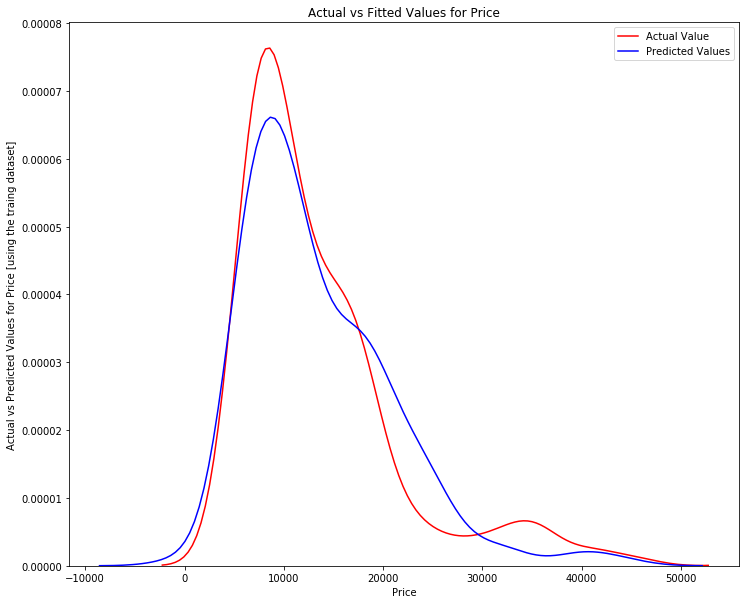

In [36]:
dist_plot(y_train, yhat_train, 'Actual vs Predicted Values for Price [using the traing dataset]')

Our model